# Atelier2 : Vectorisation 2 (Word Embedding)



# 1.	Objectif 


L’objectif de cet atelier est de decouvrire les techniques de vectorisation non superivisés: SVD, Word2Vec et GloVe
Nous reprenons le meme dataset de l'atelier precedent

# 2.	Outils et environnement de travail 


    *installer Gensim: pip install --upgrade gensim

# 1.	Preparation du DataSet

Ecrire le code permettant de Recuperer le dataset du plagiarisme traité dans l'atelier precedent: 

In [1]:
import glob

def get_corpus():
    '''Uttiliser la librairie glob pour recuperer les documents dans une 
    liste de listes dont les sous listes representent le contenu des documents 
    du corpus'''
    
    files=glob.glob('C:/Users/ismail/Desktop/corpus/*')
    f_pointers=[open(file,"r",encoding="utf8", errors='ignore') for file in files]
    corpus=[f.read() for f in f_pointers]
    return corpus



Appliquer les Praitraitements necessaires 

In [2]:
def preprocessing(corpus):
    '''Appliquer la segmentation, le cleaning et la lemmatisation'''
    from nltk.stem import WordNetLemmatizer
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords

    lemmmatizer=WordNetLemmatizer()
    words=[]
    for i in corpus:
        word_tokens = [word.lower() for word in word_tokenize(i)]
        words.append([lemmmatizer.lemmatize(word.lower()) for word in word_tokens if(not word in set(stopwords.words('english')) and  word.isalpha())]) 
    return words
c=preprocessing(get_corpus())

In [3]:
len(c)
c[0]

['inheritance',
 'basic',
 'concept',
 'programming',
 'basic',
 'idea',
 'create',
 'new',
 'class',
 'add',
 'extra',
 'detail',
 'existing',
 'class',
 'done',
 'allowing',
 'new',
 'class',
 'reuse',
 'method',
 'variable',
 'existing',
 'class',
 'new',
 'method',
 'class',
 'added',
 'specialise',
 'new',
 'class',
 'inheritance',
 'model',
 'relationship',
 'entity',
 'object',
 'example',
 'postgraduate',
 'undergraduate',
 'kind',
 'student',
 'kind',
 'relationship',
 'visualised',
 'tree',
 'structure',
 'student',
 'would',
 'general',
 'root',
 'node',
 'postgraduate',
 'undergraduate',
 'would',
 'specialised',
 'extension',
 'student',
 'node',
 'child',
 'node',
 'relationship',
 'student',
 'would',
 'known',
 'superclass',
 'parent',
 'class',
 'whereas',
 'postgraduate',
 'would',
 'known',
 'subclass',
 'child',
 'class',
 'postgraduate',
 'class',
 'extends',
 'student',
 'class',
 'inheritance',
 'occur',
 'several',
 'layer',
 'visualised',
 'would',
 'display',


In [4]:
len(c)
type(c[0])

list

Generer le vocabulaire sous forme d'une liste de termes distincts est triés dans l'ordre lexicograpique

In [3]:
def getVocab(corpus):
    from nltk.stem import WordNetLemmatizer
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords

    lemmmatizer=WordNetLemmatizer()
    d=set()
    for i in corpus:
        word_tokens = [word.lower() for word in word_tokenize(i)]
        words = [lemmmatizer.lemmatize(word.lower()) for word in word_tokens if(not word in set(stopwords.words('english')) and  word.isalpha())] 
        d=d.union(set(words))
    print(len(d))
    return sorted(d)

In [4]:
vocabulary=getVocab(get_corpus())

1699


In [7]:
vocabulary

['ab',
 'ability',
 'able',
 'abstraction',
 'abstractly',
 'abused',
 'academic',
 'acceptable',
 'accepted',
 'access',
 'accidently',
 'accomplished',
 'according',
 'accordingly',
 'account',
 'accuracy',
 'accurate',
 'accurately',
 'achieve',
 'achieved',
 'acoustic',
 'acquire',
 'acquired',
 'across',
 'act',
 'action',
 'actively',
 'activity',
 'actual',
 'actually',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'adjacent',
 'adjust',
 'adoursment',
 'advance',
 'advanced',
 'advantage',
 'advantageous',
 'advertising',
 'aeroplane',
 'affect',
 'affected',
 'age',
 'agree',
 'ai',
 'aim',
 'aka',
 'algebra',
 'algebraic',
 'algorithm',
 'algorithmic',
 'algorthem',
 'allow',
 'allowes',
 'allowing',
 'allows',
 'allready',
 'alone',
 'along',
 'alot',
 'already',
 'also',
 'alter',
 'alteration',
 'alternate',
 'although',
 'always',
 'amateur',
 'american',
 'among',
 'amongst',
 'amount',
 'analyse',
 'analysing',
 'analysis',
 'ana

# 2.	Approche à base des Cooccurrences

Construire une matrice carrée des cooccurrences (Terme à Terme) pour  une fenêtre de taille 𝑛 en considérant les n mots  avant et après le mot  central de la fenêtre. 


In [8]:
import numpy as np

def CoMat(corpus,n):
    V=len(vocabulary)
    M=np.zeros((V,V))
    for doc in corpus:
        #doc=doc.split(" ")
        T=len(doc)-2*n+1 if n<len(doc) else 1  #le nombre de fenetre dans le document
        for t in range(T):
            m=doc[t:t+2*n+1]
            for i in range(len(m)):
                for j in range(i+1,len(m)):
                    ii=vocabulary.index(m[i])
                    jj=vocabulary.index(m[j])
                    M[ii,jj]+=1
                    M[jj,ii]+=1
    return M
                
t=CoMat(preprocessing(get_corpus()),2)             
         

In [9]:
t

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Appliquer La SVD pour obtenir une representation vectorielle des differents mots du vocabulaire dans un espace de dimension 2. 

In [10]:

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

def Reduce(M,k=2):
    svd = TruncatedSVD(n_components=k)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)
    vectors = lsa.fit_transform(M)
    return vectors 
vectors=Reduce(t)

En se servant de la bibliotheque matplotlib Tracer les vecteurs obtenus dans un plan 2D 

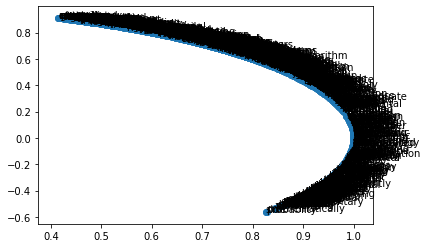

In [21]:
from matplotlib import pyplot

def plotVectors(vectors, vocabulary):
    V=len(vocabulary)
    x=[vectors[i][0] for i in range(V)]
    y=[vectors[i][1] for i in range(V)]
    fig, ax = pyplot.subplots()
    ax.scatter(x, y)
    for i, txt in enumerate(vocabulary):
        ax.annotate(txt, (x[i], y[i]))
plotVectors(vectors,vocabulary)

# 3.	Approchee iteratives 

## 3.1. Word2Vec

Word2Vec est un algorithme à base des réseaux de neurones et qui permet d'avoir une représentation vectorielle des mots contenus dans un corpus très large de documents texte de telle sorte que les mots qui se répètent toujours ensemble dans les mêmes contextes auront des représentations vectorielles similaires.

L'algorithme word2Vect doit tourner sur un corpus très large de documents texte afin d'obtenir un modèle donnant une bonne représentation vectorielle d'un nombre important de mots. Cela nécessitera bien évidement un temps considérable pendant le processus d'apprentissage et nécessitera également des ressources importantes en matière de CPU et de RAM. 

La librairie Gensim fourni une implémentation de l'algorithme Word2Vec avec des modèles préétablis qui peuvent être exploités dans la comparaison de documents texte :

    *fasttext-wiki-news-subwords-300
    *conceptnet-numberbatch-17-06-300
    *word2vec-ruscorpora-300
    *word2vec-google-news-300
    *glove-wiki-gigaword-50
    *glove-wiki-gigaword-100
    *glove-wiki-gigaword-200
    *glove-wiki-gigaword-300
    *glove-twitter-25
    *glove-twitter-50
    *glove-twitter-100
    *glove-twitter-200

Ci-dessous un code permettant de récupérer le modèle préétabli contenant 1193514 mots représentés dans un espace vectoriel de dimension 25

In [22]:
pip install --upgrade gensim

Requirement already up-to-date: gensim in c:\users\ismail\anaconda3\lib\site-packages (4.0.1)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import gensim.downloader
glove_vectors = gensim.downloader.load('glove-twitter-25')


In [17]:
import numpy as np

Le modèle préétablis peut être utilisé pour récupérer les représentations vectorielles des mots comme ci-dessous.

In [24]:
vec_data = glove_vectors['data']
print(vec_data)

[ 1.1666    0.35531  -0.29362  -0.52206   1.4224   -0.30116   0.045792
 -0.028705  1.8792    0.28175   0.55703  -0.71944  -3.0101    0.41258
  0.3052   -0.12702  -0.25783   0.90687  -0.026371 -1.0942   -1.03
 -1.2379   -0.65783   0.14663  -1.3532  ]


In [25]:
'data' in glove_vectors.index_to_key

True

Genism offre plusieurs fonctions permettant de récupérer et d'exploiter les similarités entre les mots en se basant sur leurs représentations vectorielles.

    *Le code ci-deesous permet de ecuperer les 10 terms les plus similaires à un terme donné. 

In [27]:
glove_vectors.most_similar('data',topn=10)

[('mobile', 0.8975883722305298),
 ('software', 0.8674772381782532),
 ('search', 0.8633924722671509),
 ('survey', 0.8620768189430237),
 ('web', 0.8545363545417786),
 ('server', 0.8542978763580322),
 ('marketing', 0.8416520953178406),
 ('file', 0.8381796479225159),
 ('system', 0.8372836112976074),
 ('google', 0.8370376229286194)]

    *Le code ci-dessous permet de récupérer l'ordre de similarité entre deux termes?

In [28]:
glove_vectors.similarity('data', 'information')

0.8011154

    *Le code ci-dessous permet de récupérer le terme le moins convenable dans un ensemble de termes en se basant sur leurs similarités.

In [29]:
print(glove_vectors.doesnt_match(['data', 'information', 'processing', 'computer', 'car','machine','dashboard']))

car


Bien évidemment, on peut apprendre notre propre modèle en suivant les étapes ci-dessous

    *Récupérer le corpus (Voir le code dans la section 1)
    *Réaliser les prétraitements nécessaires pour obtenir la liste des documents segmentés: une liste de listes tq chaque sous listes comporte les mots d'un documents du corpus.

In [5]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

lemmmatizer=WordNetLemmatizer()
corpus_lemetized=[]
for doc in get_corpus(): 
    words = word_tokenize(doc)
    words = [lemmmatizer.lemmatize(word.lower()) for word in words if(not word in set(stopwords.words('english')) and  word.isalpha())]
    corpus_lemetized.append(words)
#corpus_lemetized




In [31]:
corpus_lemetized

[['inheritance',
  'basic',
  'concept',
  'programming',
  'basic',
  'idea',
  'create',
  'new',
  'class',
  'add',
  'extra',
  'detail',
  'existing',
  'class',
  'this',
  'done',
  'allowing',
  'new',
  'class',
  'reuse',
  'method',
  'variable',
  'existing',
  'class',
  'new',
  'method',
  'class',
  'added',
  'specialise',
  'new',
  'class',
  'inheritance',
  'model',
  'relationship',
  'entity',
  'object',
  'example',
  'postgraduate',
  'undergraduate',
  'kind',
  'student',
  'this',
  'kind',
  'relationship',
  'visualised',
  'tree',
  'structure',
  'student',
  'would',
  'general',
  'root',
  'node',
  'postgraduate',
  'undergraduate',
  'would',
  'specialised',
  'extension',
  'student',
  'node',
  'child',
  'node',
  'in',
  'relationship',
  'student',
  'would',
  'known',
  'superclass',
  'parent',
  'class',
  'whereas',
  'postgraduate',
  'would',
  'known',
  'subclass',
  'child',
  'class',
  'postgraduate',
  'class',
  'extends',
  '

Pour générer le modèle

In [6]:
from gensim.models import Word2Vec
from gensim.test.utils import datapath
from gensim.models.word2vec import PathLineSentences
model = Word2Vec(sentences=corpus_lemetized, vector_size=10, window=3, min_count=1, workers=2)


C:\Users\ismail\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Pour récupérer la representation vectorielle d'un mot:   

In [33]:
model.wv['data']
#model.wv.most_similar('data',topn=10)

array([ 0.16747229, -0.10321435,  0.20636874, -0.03240771, -0.04042168,
       -0.07192809,  0.13832998,  0.22877374, -0.1990057 , -0.00846696],
      dtype=float32)

In [34]:
model.wv['data']

array([ 0.16747229, -0.10321435,  0.20636874, -0.03240771, -0.04042168,
       -0.07192809,  0.13832998,  0.22877374, -0.1990057 , -0.00846696],
      dtype=float32)

In [35]:
model.wv['superclass']

array([ 0.2709069 , -0.12630689,  0.29897764,  0.14587206,  0.05235713,
        0.08906197,  0.4289181 ,  0.4656912 , -0.4287454 , -0.19873597],
      dtype=float32)

Pour récupérer tous les vecteurs

In [36]:
vectors_no_reduce=model.wv.vectors

Recuperer tous le smots 

In [37]:
words = model.wv.index_to_key
words

['probability',
 'the',
 'class',
 'vector',
 'document',
 'term',
 'page',
 'programming',
 'used',
 'pagerank',
 'a',
 'problem',
 'inheritance',
 'link',
 'bayes',
 'method',
 'b',
 'theorem',
 'word',
 'value',
 'one',
 'solution',
 'optimal',
 'model',
 'p',
 'it',
 'google',
 'object',
 'in',
 'given',
 'event',
 'information',
 'space',
 'also',
 'number',
 'subproblems',
 'algorithm',
 'dynamic',
 'example',
 'called',
 'way',
 'conditional',
 'new',
 'using',
 'may',
 'web',
 'for',
 'student',
 'search',
 'this',
 'time',
 'mean',
 'two',
 'many',
 'code',
 'known',
 'different',
 'computer',
 'query',
 'result',
 'retrieval',
 'however',
 'random',
 'use',
 'program',
 'compute',
 'fruit',
 'represented',
 'apple',
 'first',
 'find',
 'need',
 'marginal',
 'set',
 'solving',
 'inherit',
 'property',
 'if',
 'subclass',
 'system',
 'site',
 'theory',
 'process',
 'importance',
 'approach',
 'match',
 'ranking',
 'substructure',
 'instance',
 'application',
 'similarity',
 'co

   * **Appliquer La SVD pour reduire la dimesion de la representation vectorielle des termes pour les representer dans un espace de dimension 2
   * **Tracer les vecteurs obtenus en se seravt de la bibliotheque matplolib



## ça suffit d'appeler la fonction définis en haut qui permet d'appliquer la svd et tracez les vecteurs 

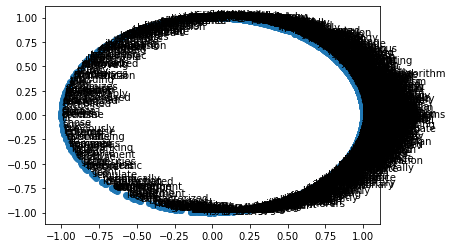

In [38]:
vectors=model.wv.vectors
vector_reduced=Reduce(vectors)
plotVectors(vector_reduced,words)

# dans le code ci dessous je rend tous mes vecteur en une dimension 2 de mon modéle 

**En se servant de la représentation vectorielle obtenue, calculer les similarités entre les réponses des étudiants et les définitions trouvées sur Wikipédia.

1. Réaliser une représentation vectorielle des documents en se basant sur les représentations vectorielles de leurs mots (une moyenne par exemple) et utiliser par la suite la distance euclidienne ou la distance corsinus.

2. Utiliser l'indice de Jaccard en comparant directement les mots deux à deux (on considère un seuil de similarité >0.7)

3. Utiliser une approche n-grame en utilisant une fenêtre de n termes.



In [39]:
#model.wv.vectors=vector_reduced

## La représentation vectorielle des documents (moyenne)

In [10]:
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

lemmmatizer=WordNetLemmatizer()
doc_representation=[]#contient une moyenne qui représente notre document
vect_doc=[]#contient tableau de tableau ( vectorisation des mots d'un doc)
c=[]#contient notre document tokenizer
for doc in get_corpus(): 
    words = word_tokenize(doc)
    t=[lemmmatizer.lemmatize(word.lower()) for word in words if(not word in set(stopwords.words('english')) and  word.isalpha())]
    words = [model.wv[lemmmatizer.lemmatize(word.lower())] for word in words if(not word in set(stopwords.words('english')) and  word.isalpha())]
    vect_doc.append(words)
    c.append(t)
    v=np.zeros(len(words[0]))
    for vi in words:
        v+=vi
    d=v/len(words)
    doc_representation.append(d)





je découpe mes tasks chacune dans un tableau 


In [41]:
taska=[doc_representation[5*i] for i in range(19)]
taskb=[doc_representation[5*i+1] for i in range(19)]
taskc=[doc_representation[5*i+2] for i in range(19)]
taskd=[doc_representation[5*i+3] for i in range(19)]
taske=[doc_representation[5*i+4] for i in range(19)]

In [42]:
task=doc_representation[95:]
#print(task)
tasks=[]
tasks.append(taska)
tasks.append(taskb)
tasks.append(taskc)
tasks.append(taskd)
tasks.append(taske)

## fonction calculant la distance euclidienne

In [43]:
def euc(d1,d2):
    s=0
    for k in range(len(d1)):
         s+=(d1[k]-d2[k])**2
    return np.sqrt(s)

In [44]:
euc(doc_representation[0],doc_representation[96])

0.03688899277961881

In [45]:


#on a 4 groupes et en chaque groupe groupe 5 etudiant A B C D E DONC
tab=[]
for k in range(5):
    print("#####result for task "+chr(ord('a')+k)+"##########")
    l=-1
    b=0
    tp={}
    for t in range(19):
        if t%5==0:
            b=0
            l+=1

        tp["Groupe "+str(l)+"e"+chr(ord('A')+b)+":"]=1-euc(tasks[k][t],task[k])
        b+=1
    tab.append(tp)
    print(tp)


#####result for task a##########
{'Groupe 0eA:': 0.9555070057207459, 'Groupe 0eB:': 0.8388076757424052, 'Groupe 0eC:': 0.9381073135744911, 'Groupe 0eD:': 0.9349073733942574, 'Groupe 0eE:': 0.9966721209466409, 'Groupe 1eA:': 0.9207938657241149, 'Groupe 1eB:': 0.757488014396381, 'Groupe 1eC:': 0.9409141493683945, 'Groupe 1eD:': 0.7832147800262961, 'Groupe 1eE:': 0.9526299007507734, 'Groupe 2eA:': 0.9791977279389882, 'Groupe 2eB:': 0.9305901760428769, 'Groupe 2eC:': 0.9392809605455006, 'Groupe 2eD:': 0.8753488069713065, 'Groupe 2eE:': 0.9155689194835517, 'Groupe 3eA:': 0.8953386363962913, 'Groupe 3eB:': 0.9834932701206343, 'Groupe 3eC:': 0.8962358562924956, 'Groupe 3eD:': 0.9412025388464607}
#####result for task b##########
{'Groupe 0eA:': 0.9773859239510063, 'Groupe 0eB:': 0.9315042517727501, 'Groupe 0eC:': 0.9600919961946787, 'Groupe 0eD:': 0.9082156505173196, 'Groupe 0eE:': 0.9297071798800056, 'Groupe 1eA:': 0.9773371297463214, 'Groupe 1eB:': 0.9580422297044012, 'Groupe 1eC:': 0.950199

## 2)Indice de jaccard deux a deux

In [46]:
def jaccard_similarity(m1,m2):
    res=np.dot(m1,m2)/(np.linalg.norm(m1)*np.linalg.norm(m2))
    if res <0.75:
        return 0
    else:
        return res
#vect_doc contient un tableau de tableau chaque element est la représentation vectorielle d'un mot 
#l'idee que j'ai prevu pour comparer 2 par 2 est de faire une moyenne entre chaque 2 et la comparer
#avec les deux autres en utilisant la simjaccard que j'ai definie ensuite je ferai une division sur 
#le totale

In [47]:
taska=[vect_doc[5*i] for i in range(19)]
taskb=[vect_doc[5*i+1] for i in range(19)]
taskc=[vect_doc[5*i+2] for i in range(19)]
taskd=[vect_doc[5*i+3] for i in range(19)]
taske=[vect_doc[5*i+4] for i in range(19)]
task=vect_doc[95:]
#print(task)
tasks=[]
tasks.append(taska)
tasks.append(taskb)
tasks.append(taskc)
tasks.append(taskd)
tasks.append(taske)
#on a 4 groupes et en chaque groupe groupe 5 etudiant A B C D E DONC
tab=[]
for k in range(5):
    print("#####result for task "+chr(ord('a')+k)+"##########")
    l=-1
    b=0
    tp={}
    for t in range(19):
        if t%5==0:
            b=0
            l+=1
        n=len(tasks[k][t])
        m=len(task[k])
        res=0
        for i in range(n-1):
            t1=(tasks[k][t][i]+tasks[k][t][i+1])/2
            
            for j in range(m-1):
                t2=(task[k][j]+task[k][j+1])/2
                res+=jaccard_similarity(t1,t2)
        tp["Groupe "+str(l)+"e"+chr(ord('A')+b)+":"]=res/((n-1)*(m-1))
        b+=1
    tab.append(tp)
    print(tp)

#####result for task a##########
{'Groupe 0eA:': 0.8644527594866648, 'Groupe 0eB:': 0.795647061127839, 'Groupe 0eC:': 0.8113145758256768, 'Groupe 0eD:': 0.9318333019889622, 'Groupe 0eE:': 0.9222000499607446, 'Groupe 1eA:': 0.8891008476553698, 'Groupe 1eB:': 0.7296012849713085, 'Groupe 1eC:': 0.8642551402259957, 'Groupe 1eD:': 0.755914222069762, 'Groupe 1eE:': 0.8785081873406897, 'Groupe 2eA:': 0.8892090359084719, 'Groupe 2eB:': 0.89158891496919, 'Groupe 2eC:': 0.875877183661683, 'Groupe 2eD:': 0.8633184866245949, 'Groupe 2eE:': 0.9311995034305219, 'Groupe 3eA:': 0.8052407772593768, 'Groupe 3eB:': 0.9200761247822058, 'Groupe 3eC:': 0.8634443101012361, 'Groupe 3eD:': 0.8507964483500228}
#####result for task b##########
{'Groupe 0eA:': 0.7921795670007791, 'Groupe 0eB:': 0.8072819487584961, 'Groupe 0eC:': 0.7411902668406662, 'Groupe 0eD:': 0.7635095014822656, 'Groupe 0eE:': 0.7358499045272668, 'Groupe 1eA:': 0.7900850659426564, 'Groupe 1eB:': 0.7721677688338341, 'Groupe 1eC:': 0.7637186761

In [11]:
def jaccard_similarity(m1,m2):
    res=np.dot(m1,m2)/(np.linalg.norm(m1)**2+np.linalg.norm(m2)**2-np.dot(m1,m2))
    if res <0.75:
        return 0
    else:
        return res
#vect_doc contient un tableau de tableau chaque element est la représentation vectorielle d'un mot 
#l'idee que j'ai prevu pour comparer 2 par 2 est de faire une moyenne entre chaque 2 et la comparer
#avec les deux autres en utilisant la simjaccard que j'ai definie ensuite je ferai une division sur 
#le totale

In [15]:
def jaccard_similarity(m1,m2):
    s1=0
    s2=0
    n=len(m1)
    m=len(m2)

    for i in range(m):
        if m1[i]>m2[i]:
            s1+=m1[i]
            s2+=m2[i]
        else:
            s1+=m2[i]
            s2+=m1[i]
    res=s2/s1
    if res <0.75:
        return 0
    else:
        return res
#vect_doc contient un tableau de tableau chaque element est la représentation vectorielle d'un mot 
#l'idee que j'ai prevu pour comparer 2 par 2 est de faire une moyenne entre chaque 2 et la comparer
#avec les deux autres en utilisant la simjaccard que j'ai definie ensuite je ferai une division sur 
#le totale

In [19]:
taska=[vect_doc[5*i] for i in range(19)]
taskb=[vect_doc[5*i+1] for i in range(19)]
taskc=[vect_doc[5*i+2] for i in range(19)]
taskd=[vect_doc[5*i+3] for i in range(19)]
taske=[vect_doc[5*i+4] for i in range(19)]
task=vect_doc[95:]
#print(task)
tasks=[]
tasks.append(taska)
tasks.append(taskb)
tasks.append(taskc)
tasks.append(taskd)
tasks.append(taske)
#on a 4 groupes et en chaque groupe groupe 5 etudiant A B C D E DONC
tab=[]
for k in range(5):
    print("#####result for task "+chr(ord('a')+k)+"##########")
    l=-1
    b=0
    tp={}
    for t in range(19):
        if t%5==0:
            b=0
            l+=1
        n=len(tasks[k][t])
        m=len(task[k])
        res=0
        for i in range(n-1):
            t1=(tasks[k][t][i]+tasks[k][t][i+1])/2
            
            for j in range(m-1):
                t2=(task[k][j]+task[k][j+1])/2
                res+=jaccard_similarity(t1,t2)
        tp["Groupe "+str(l)+"e"+chr(ord('A')+b)+":"]=np.abs(1-res/n)
        b+=1
    tab.append(tp)
    print(tp)

#####result for task a##########
{'Groupe 0eA:': 0.8497636497796446, 'Groupe 0eB:': 0.8867773503031076, 'Groupe 0eC:': 0.7159650479091055, 'Groupe 0eD:': 0.011541225326663573, 'Groupe 0eE:': 0.21323158601656744, 'Groupe 1eA:': 0.8416965950496561, 'Groupe 1eB:': 0.9474282926215278, 'Groupe 1eC:': 0.5649603323999988, 'Groupe 1eD:': 0.9636630679089632, 'Groupe 1eE:': 0.8669047901586484, 'Groupe 2eA:': 0.19607543864430854, 'Groupe 2eB:': 0.2953941789049992, 'Groupe 2eC:': 0.8577053400109753, 'Groupe 2eD:': 0.9020105570133963, 'Groupe 2eE:': 0.34698528433345466, 'Groupe 3eA:': 0.8830718015009448, 'Groupe 3eB:': 0.19997870226796532, 'Groupe 3eC:': 0.5477060319174976, 'Groupe 3eD:': 0.7570786672626857}
#####result for task b##########
{'Groupe 0eA:': 0.24647151614077933, 'Groupe 0eB:': 0.69458810940831, 'Groupe 0eC:': 1.2492579433276667, 'Groupe 0eD:': 0.19718967174564617, 'Groupe 0eE:': 1.4708619449835991, 'Groupe 1eA:': 0.6005703745729395, 'Groupe 1eB:': 0.5819599065372394, 'Groupe 1eC:': 0

## 3) jaccard avec fenetre de n

In [48]:
#f-taille de la fenetre
f=6
taska=[vect_doc[5*i] for i in range(19)]#taskA
taskb=[vect_doc[5*i+1] for i in range(19)]
taskc=[vect_doc[5*i+2] for i in range(19)]
taskd=[vect_doc[5*i+3] for i in range(19)]
taske=[vect_doc[5*i+4] for i in range(19)]#reponse du taskE
task=vect_doc[95:]#celui la contient les vrai reponse de wikipedia
#print(task)
tasks=[]
tasks.append(taska)
tasks.append(taskb)
tasks.append(taskc)
tasks.append(taskd)
tasks.append(taske)
#on a 4 groupes et en chaque groupe groupe 5 etudiant A B C D E DONC
tab=[]
for k in range(5):
    print("#####result for task "+chr(ord('a')+k)+"##########")
    l=-1
    b=0
    tp={}
    for t in range(19):
        if t%5==0:
            b=0
            l+=1
        n=len(tasks[k][t])
        m=len(task[k])
        res=0
        for i in range(n-(f-1)):
            temp=tasks[k][t][i:i+f]
            v=np.zeros(len(tasks[k][t][0]))
            for e in temp:
                v+=e
            t1=v/len(tasks[k][t][0])
            
            for j in range(m-(f-1)):
                tempp=task[k][j:j+f]
                v2=np.zeros(len(task[k][j]))
                for e in tempp:
                    v2+=e
                t2=v2/len(task[k][j])
                res+=jaccard_similarity(t1,t2)
        tp["Groupe "+str(l)+"e"+chr(ord('A')+b)+":"]=res/((n--1)*(m-1))
        b+=1
    tab.append(tp)
    print(tp)

#####result for task a##########
{'Groupe 0eA:': 0.9184112430873753, 'Groupe 0eB:': 0.918078954825471, 'Groupe 0eC:': 0.9086537040873822, 'Groupe 0eD:': 0.9103430531188534, 'Groupe 0eE:': 0.9302255554909763, 'Groupe 1eA:': 0.9150214001190884, 'Groupe 1eB:': 0.8648388394583051, 'Groupe 1eC:': 0.916060838685276, 'Groupe 1eD:': 0.9057241256161157, 'Groupe 1eE:': 0.9196231203330255, 'Groupe 2eA:': 0.915576536615518, 'Groupe 2eB:': 0.9316722131170287, 'Groupe 2eC:': 0.9078861566709271, 'Groupe 2eD:': 0.9087158140531005, 'Groupe 2eE:': 0.8858314712984211, 'Groupe 3eA:': 0.9115910685154959, 'Groupe 3eB:': 0.9306963931027817, 'Groupe 3eC:': 0.9132852943505635, 'Groupe 3eD:': 0.9167321800435174}
#####result for task b##########
{'Groupe 0eA:': 0.9185044234546081, 'Groupe 0eB:': 0.9238820913419626, 'Groupe 0eC:': 0.9111140228781381, 'Groupe 0eD:': 0.843716437338847, 'Groupe 0eE:': 0.835249139997228, 'Groupe 1eA:': 0.9144406483192392, 'Groupe 1eB:': 0.9146616535039738, 'Groupe 1eC:': 0.9254164740

# 3.2. Doc2Vec

Doc2Vec est une implémentation de l'algorithme Paragraph Vector qui est basé sur Word2Vec et qui est plus adapté à la comparaison de documents texte en se basant sur leur représentations vectorielles.

Cet algorithme dépasse dans sa performance l’utilisation des moyenne des représentations vectorielles des mots présents dans un documents texte.


    *Generer le modèle

In [6]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_lemetized)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

Pour récupérer la representation vectorielle de tous les documents   

In [16]:
vectors=model.dv.vectors
len(vectors)

100

Pour récupérer la les labels de tous les documents   

In [17]:
labels=model.dv.index_to_key
labels

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

Pour récupérer la représentation vectorielle d'un document particulier:

In [18]:
model.dv[80]

array([-0.04294107,  0.24702322, -0.00863424, -3.049911  , -1.4912803 ],
      dtype=float32)

In [19]:
from matplotlib import pyplot

def plotVectors(vectors, vocabulary):
    V=len(vocabulary)
    x=[vectors[i][0] for i in range(V)]
    y=[vectors[i][1] for i in range(V)]
    fig, ax = pyplot.subplots()
    ax.scatter(x, y)
    for i, txt in enumerate(vocabulary):
        ax.annotate(txt, (x[i], y[i]))
#plotVectors(vectors,vocabulary)

    **Appliquer La SVD pour réduire la dimension de la représentation vectorielle des termes pour les représenter dans un espace de dimension 2?
    **Tracer les vecteurs obtenus en se servant de la bibliothèque matplolib?

In [20]:
vector_reduced=Reduce(vectors)
len(vectors)

100

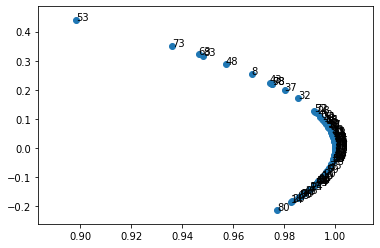

In [21]:
plotVectors(vector_reduced,labels)

    **Recalculer les similarités entre les réponses des étudiants et les définitions trouvées sur Wikipédia en se basant sur ses nouvelles représentations ?

# similarité syntaxique (euclidienne)


In [22]:
def euc(d1,d2):
    s=0
    for k in range(len(d1)):
         s+=(d1[k]-d2[k])**2
    return np.sqrt(s)

In [24]:
taska=[vectors[5*i] for i in range(19)]#taskA
taskb=[vectors[5*i+1] for i in range(19)]
taskc=[vectors[5*i+2] for i in range(19)]
taskd=[vectors[5*i+3] for i in range(19)]
taske=[vectors[5*i+4] for i in range(19)]#reponse du taskE
task=vectors[95:]#celui la contient les vrai reponse de wikipedia
#print(task)
tasks=[]
tasks.append(taska)
tasks.append(taskb)
tasks.append(taskc)
tasks.append(taskd)
tasks.append(taske)

#on a 4 groupes et en chaque groupe groupe 5 etudiant A B C D E DONC
tab=[]
for k in range(5):
    print("#####result for task "+chr(ord('a')+k)+"##########")
    l=-1
    b=0
    tp={}
    for t in range(19):
        if t%5==0:
            b=0
            l+=1

        tp["Groupe "+str(l)+"e"+chr(ord('A')+b)+":"]=euc(tasks[k][t],task[k])
        b+=1
    tab.append(tp)
    print(tp)


#####result for task a##########
{'Groupe 0eA:': 0.5041824197031669, 'Groupe 0eB:': 1.1045672747086768, 'Groupe 0eC:': 0.3323122107711887, 'Groupe 0eD:': 0.8173485224420017, 'Groupe 0eE:': 0.41451534243724625, 'Groupe 1eA:': 0.57829971293469, 'Groupe 1eB:': 0.6704173750097493, 'Groupe 1eC:': 0.3670834696219697, 'Groupe 1eD:': 1.6870167842305566, 'Groupe 1eE:': 0.5543087145548825, 'Groupe 2eA:': 0.45500377039713746, 'Groupe 2eB:': 0.9844196487370257, 'Groupe 2eC:': 0.5536201908662284, 'Groupe 2eD:': 0.40939033443631206, 'Groupe 2eE:': 1.2378228556217445, 'Groupe 3eA:': 0.6662223022389588, 'Groupe 3eB:': 0.5387326678460417, 'Groupe 3eC:': 0.6070946675011151, 'Groupe 3eD:': 1.0223120935129764}
#####result for task b##########
{'Groupe 0eA:': 1.4985207481726752, 'Groupe 0eB:': 1.2670477762040762, 'Groupe 0eC:': 1.4789173381697127, 'Groupe 0eD:': 2.521798533286487, 'Groupe 0eE:': 2.246781756324434, 'Groupe 1eA:': 1.502494992223595, 'Groupe 1eB:': 1.2221104670601888, 'Groupe 1eC:': 0.6612575

# Similarité  2

In [25]:
def jaccard_similarity(m1,m2):
    res=np.dot(m1,m2)/(np.linalg.norm(m1)*np.linalg.norm(m2))

    return res

In [26]:
taska=[vectors[5*i] for i in range(19)]#taskA
taskb=[vectors[5*i+1] for i in range(19)]
taskc=[vectors[5*i+2] for i in range(19)]
taskd=[vectors[5*i+3] for i in range(19)]
taske=[vectors[5*i+4] for i in range(19)]#reponse du taskE
task=vectors[95:]#celui la contient les vrai reponse de wikipedia
#print(task)
tasks=[]
tasks.append(taska)
tasks.append(taskb)
tasks.append(taskc)
tasks.append(taskd)
tasks.append(taske)

#on a 4 groupes et en chaque groupe groupe 5 etudiant A B C D E DONC
tab=[]
for k in range(5):
    print("#####result for task "+chr(ord('a')+k)+"##########")
    l=-1
    b=0
    tp={}
    for t in range(19):
        if t%5==0:
            b=0
            l+=1

        tp["Groupe "+str(l)+"e"+chr(ord('A')+b)+":"]=jaccard_similarity(tasks[k][t],task[k])
        b+=1
    tab.append(tp)
    print(tp)


#####result for task a##########
{'Groupe 0eA:': 0.9926437, 'Groupe 0eB:': 0.9926426, 'Groupe 0eC:': 0.9945893, 'Groupe 0eD:': 0.9935632, 'Groupe 0eE:': 0.99436134, 'Groupe 1eA:': 0.9955858, 'Groupe 1eB:': 0.97960275, 'Groupe 1eC:': 0.99532, 'Groupe 1eD:': 0.9757044, 'Groupe 1eE:': 0.9841562, 'Groupe 2eA:': 0.9892687, 'Groupe 2eB:': 0.99401385, 'Groupe 2eC:': 0.9841457, 'Groupe 2eD:': 0.9936981, 'Groupe 2eE:': 0.9906559, 'Groupe 3eA:': 0.98145473, 'Groupe 3eB:': 0.9903161, 'Groupe 3eC:': 0.9898448, 'Groupe 3eD:': 0.9917691}
#####result for task b##########
{'Groupe 0eA:': 0.9955056, 'Groupe 0eB:': 0.996569, 'Groupe 0eC:': 0.9950381, 'Groupe 0eD:': 0.98622406, 'Groupe 0eE:': 0.99416184, 'Groupe 1eA:': 0.9927472, 'Groupe 1eB:': 0.9919421, 'Groupe 1eC:': 0.9937099, 'Groupe 1eD:': 0.9975137, 'Groupe 1eE:': 0.99490154, 'Groupe 2eA:': 0.9915964, 'Groupe 2eB:': 0.99545425, 'Groupe 2eC:': 0.9901352, 'Groupe 2eD:': 0.99668723, 'Groupe 2eE:': 0.9942988, 'Groupe 3eA:': 0.99635875, 'Groupe 3eB:': 